<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part3/ch07_pvalue_hacking.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.4 P-Value Hacking and Other Dangerous Behavior

Statistical significance testing is powerful, but it can be misused—intentionally or accidentally. This section highlights common pitfalls and ethical concerns in hypothesis testing.

## The Replication Crisis

In recent years, many scientific fields have faced a **replication crisis**: published "significant" findings fail to replicate when other researchers try to reproduce them. A major contributor is the misuse of p-values and significance testing.

```{important}
A statistically significant result does **not** mean:
- The effect is large or important
- The finding is true
- The research is reliable

It only means: *If the null hypothesis were true, data this extreme would be unlikely.*


## What is P-Hacking?

**P-hacking** (also called "data dredging" or "significance chasing") refers to manipulating data analysis until statistical significance is achieved. This can be done:

1. **Selectively reporting outcomes** — Testing many outcomes but only reporting significant ones
2. **Stopping data collection when significant** — Checking significance repeatedly and stopping when p < 0.05
3. **Trying multiple tests** — Analyzing data many ways and reporting the one that works
4. **Removing "outliers" strategically** — Excluding data points that hurt significance
5. **Subgroup analysis** — Splitting data into groups until finding a significant effect
6. **Changing hypotheses post-hoc** — Switching from two-sided to one-sided tests, or changing the null hypothesis after seeing data

### Example: The Jelly Bean Problem

{admonition} A Cautionary Tale
Researcher: "We tested if jelly beans cause acne."
Editor: "What did you find?"
Researcher: "No significant effect (p = 0.30)."
Editor: "Try different colors."

*Tests 20 colors...*

Researcher: "Green jelly beans are linked to acne (p = 0.04)!"
Editor: "Publish it!"

**What went wrong?** With 20 tests at α = 0.05, we expect 20 × 0.05 = 1 false positive even if there's no real effect. The "significant" result for green is likely a false alarm.


This classic XKCD comic ([#882](https://xkcd.com/882/)) illustrates how multiple testing inflates false positives.

## Common Forms of P-Hacking

### 1. Multiple Comparisons Problem

**The Problem**: Testing multiple hypotheses inflates the chance of finding at least one "significant" result by chance.

**Example**: Testing if 10 drugs work using α = 0.05 for each test:
- Probability of at least one false positive ≈ $1 - (1-0.05)^{10} \approx 0.40$
- Even if no drugs work, there's a 40% chance of declaring at least one "effective"

**Solutions**:
- **Bonferroni correction**: Use $\alpha/m$ for each of $m$ tests
  - If testing 10 hypotheses, use $\alpha = 0.05/10 = 0.005$ for each
  - Conservative but protects against false positives
- **Holm-Bonferroni**: Less conservative sequential method
- **False Discovery Rate (FDR)**: Control expected proportion of false positives
- **Pre-specify primary outcome**: Designate one main hypothesis before data collection

### 2. Optional Stopping

**The Problem**: Checking significance repeatedly during data collection and stopping when p < 0.05.

**Why it's wrong**: Each check is like a new chance to get a false positive. Enough checks will eventually produce p < 0.05 even with no real effect.

**Example**:

After 10 subjects: p = 0.12 (keep going...)
After 20 subjects: p = 0.08 (keep going...)
After 30 subjects: p = 0.04 (stop and publish!)


**Solutions**:
- Decide sample size in advance and collect all data before testing
- If you must check early, use **sequential analysis** methods designed for this
- Use stricter significance levels if checking multiple times

### 3. Researcher Degrees of Freedom

**The Problem**: Making many small decisions during analysis, each of which could affect significance.

Examples:
- Which covariates to include in a model?
- How to handle missing data?
- Whether to transform variables?
- Which observations are "outliers"?
- How to define the outcome variable?

Each decision is a "fork in the road." With enough forks, one path will lead to p < 0.05.

**Solutions**:
- **Pre-registration**: Publicly specify analysis plan before seeing data
- **Robustness checks**: Report results under different reasonable choices
- **Transparency**: Report all analyses attempted, not just significant ones

### 4. HARKing

**HARKing** = "Hypothesizing After Results are Known"

**The Problem**: Analyzing data exploratorily, finding an interesting pattern, then writing the paper as if that pattern was predicted in advance.

**Why it's wrong**: 
- Hypothesis testing assumes the hypothesis was specified before seeing data
- Exploratory findings need confirmation in new data
- Misrepresents the scientific process

**Solution**: Clearly distinguish:
- **Confirmatory research**: Pre-specified hypotheses tested on new data
- **Exploratory research**: Discovering patterns in data (nothing wrong with this!)

Exploratory findings should be replicated before being treated as established facts.

## The Multiple Testing Cascade

{admonition} A Realistic Scenario
A researcher studying a new drug makes these decisions:

1. Test 3 different outcomes (primary, secondary, tertiary)
2. Test on 4 subgroups (age, gender, severity, prior treatment)
3. Try 2 statistical methods (t-test, non-parametric test)
4. Consider removing 3 potential outliers (include/exclude)

**Total possible tests**: $3 \times 4 \times 2 \times 2^3 = 192$ different analyses!

With α = 0.05, even if the drug has no effect:
- Expected false positives: $192 \times 0.05 \approx 9.6$
- Probability of at least one false positive: $\approx 1$

The researcher can almost guarantee finding "significance" somewhere.


## Effect Sizes Matter

**Statistical significance** ≠ **Practical importance**

With large samples, tiny, unimportant effects can be "statistically significant."

{admonition} Example: The .01mm Difference
A study with 1 million subjects finds:
- **Group A mean height**: 170.00 cm
- **Group B mean height**: 170.01 cm  
- **Difference**: 0.01 cm (0.1 mm)
- **p-value**: 0.001 (highly significant!)

**Technically**: The result is statistically significant.

**Practically**: A 0.1mm difference is meaningless. The groups are essentially identical.


**Solution**: Always report **effect sizes** along with p-values:
- Difference in means
- Cohen's d (standardized difference)
- Correlation coefficient
- Odds ratio
- Confidence intervals

These tell you if the effect is **large enough to care about**.

## Garden of Forking Paths

Even well-meaning researchers can fall into traps. The **garden of forking paths** (Gelman & Loken, 2014) describes how innocent-seeming decisions compound:

1. "That data point looks weird, maybe we should exclude it."
2. "Let's control for age... and gender... and income..."
3. "The effect is stronger in younger subjects, let's look at that."
4. "Maybe a logarithmic transformation would be better."

Each decision is reasonable in isolation, but together they create multiple comparisons without anyone realizing it.

## Best Practices to Avoid P-Hacking

### Before Data Collection
1. **Pre-register your study**
   - Specify hypotheses, sample size, analysis plan
   - Platforms: OSF, AsPredicted, ClinicalTrials.gov

2. **Plan sample size** using power analysis
   - Don't stop when you reach significance
   - Don't continue indefinitely seeking significance

3. **Designate primary outcome**
   - Specify ONE main hypothesis
   - Secondary analyses are exploratory

### During Analysis
4. **Analyze blinded when possible**
   - Don't peek at results while making analytic decisions

5. **Use pre-specified analysis plan**
   - Deviations are fine but should be noted

6. **Correct for multiple testing**
   - Bonferroni, FDR, or pre-specify family-wise error rate

### When Reporting
7. **Report everything**
   - All outcomes tested, not just significant ones
   - All subgroups analyzed
   - Any deviations from pre-registered plan

8. **Report effect sizes and confidence intervals**
   - Not just p-values

9. **Distinguish confirmatory from exploratory**
   - Be honest about what was planned vs. discovered

10. **Share data and code**
    - Allow others to reproduce your analysis

## P-Values are Not Error Rates

A common misunderstanding:

{warning}
**WRONG**: "p = 0.05 means 5% chance the null hypothesis is true"

**RIGHT**: "p = 0.05 means that IF the null hypothesis were true, we'd see data this extreme 5% of the time"


The p-value is NOT:
- $P(H_0 \text{ is true} | \text{data})$ ✗

The p-value IS:
- $P(\text{data this extreme} | H_0 \text{ is true})$ ✓

To compute $P(H_0 | \text{data})$, you need Bayesian methods and prior probabilities.

## The ASA Statement on P-Values

In 2016, the American Statistical Association released a statement on p-values, warning against common misuses:

1. **P-values do not measure the probability that the studied hypothesis is true**
2. **P-values do not measure the size of an effect or importance of a result**
3. **Scientific conclusions should not be based only on whether a p-value passes a specific threshold**
4. **Proper inference requires full reporting and transparency**
5. **A p-value does not measure the probability that the data were produced by random chance alone**
6. **By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis**

## Alternatives and Supplements

### 1. Confidence Intervals
- Provide range of plausible values
- Show both statistical significance and effect size
- More informative than p-values alone

### 2. Bayesian Methods
- Directly answer: "What's the probability the hypothesis is true?"
- Incorporate prior knowledge
- No arbitrary thresholds

### 3. Effect Sizes
- Cohen's d, correlation r, odds ratios
- Interpretable magnitude of effects
- Can meta-analyze across studies

### 4. Replication
- Best evidence: independent replication
- Pre-registered replications especially valuable
- One significant result is suggestive, not conclusive

### 5. Power Analysis
- Plan sample size to detect meaningful effects
- Underpowered studies produce unreliable results

## Ethical Considerations

P-hacking is not just bad statistics—it can have serious consequences:

- **Medical research**: False positives lead to ineffective or harmful treatments
- **Social policy**: Bad data leads to bad policy decisions  
- **Public trust**: Replication failures erode confidence in science
- **Wasted resources**: Others waste time following up false leads

{important}
**Questionable Research Practices (QRPs)**

Actions that fall short of fraud but undermine scientific integrity:
- Selective reporting
- Optional stopping
- Post-hoc hypothesis changes
- Undisclosed flexibility in analysis

These are surprisingly common but can be avoided with transparency and pre-registration.


## What To Do Instead

### If you're conducting research:
1. Pre-register when possible
2. Plan sample size in advance
3. Analyze as planned
4. Report all results transparently
5. Use effect sizes and confidence intervals
6. Distinguish exploratory from confirmatory

### If you're reading research:
1. Look for pre-registration
2. Check if analyses were planned
3. Look for effect sizes, not just p-values  
4. Be skeptical of p-values barely < 0.05
5. Look for replication studies
6. Check if multiple testing corrections were used

## Python Example: Multiple Testing Simulation

SIMULATING THE MULTIPLE TESTING PROBLEM

Scenario: Testing 20 hypotheses where ALL null hypotheses are TRUE
(i.e., there is NO real effect in any test)

Number of tests: 20
Significance level: α = 0.05
Sample size per group: 30

Test  1: p = 0.7779
Test  2: p = 0.8932
Test  3: p = 0.1477
Test  4: p = 0.9484
Test  5: p = 0.3572
Test  6: p = 0.0117 * SIGNIFICANT (FALSE POSITIVE!)
Test  7: p = 0.4423
Test  8: p = 0.7269
Test  9: p = 0.5546
Test 10: p = 0.4794
Test 11: p = 0.1059
Test 12: p = 0.7240
Test 13: p = 0.1334
Test 14: p = 0.5814
Test 15: p = 0.4055
Test 16: p = 0.2948
Test 17: p = 0.2789
Test 18: p = 0.1552
Test 19: p = 0.2816
Test 20: p = 0.3906

Results:
  Number of 'significant' results: 1 out of 20
  False positive rate: 5.0%
  Expected false positives: 1.0

APPLYING MULTIPLE TESTING CORRECTIONS

1. Bonferroni Correction:
   Adjusted α = 0.0025
   Significant results: 0

2. Holm-Bonferroni:
   Significant results: 0

3. Benjamini-Hochberg (FDR):
   Significant results: 0

Sum

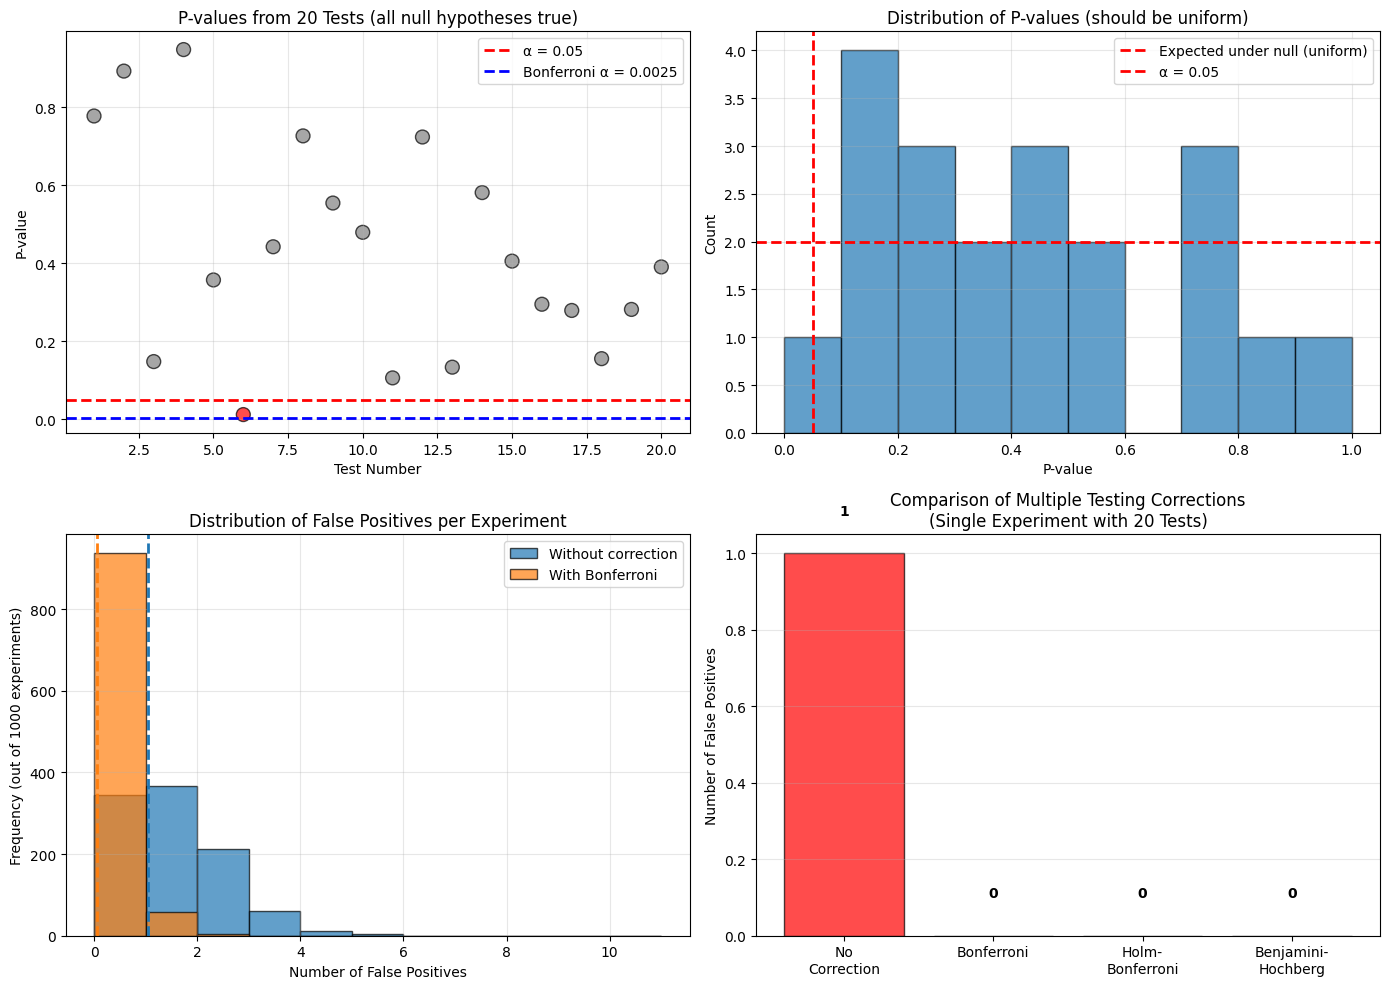

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

print("=" * 60)
print("SIMULATING THE MULTIPLE TESTING PROBLEM")
print("=" * 60)
print()
print("Scenario: Testing 20 hypotheses where ALL null hypotheses are TRUE")
print("(i.e., there is NO real effect in any test)")
print()

# Simulate 20 t-tests where null hypothesis is true for all
n_tests = 20
n_subjects = 30
alpha = 0.05

print(f"Number of tests: {n_tests}")
print(f"Significance level: α = {alpha}")
print(f"Sample size per group: {n_subjects}")
print()

# Run 20 tests
p_values = []
for i in range(n_tests):
    # Both groups from same distribution (null hypothesis is TRUE)
    group1 = np.random.normal(0, 1, n_subjects)
    group2 = np.random.normal(0, 1, n_subjects)
    
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(group1, group2)
    p_values.append(p_val)
    
    if p_val < alpha:
        print(f"Test {i+1:2d}: p = {p_val:.4f} * SIGNIFICANT (FALSE POSITIVE!)")
    else:
        print(f"Test {i+1:2d}: p = {p_val:.4f}")

p_values = np.array(p_values)
n_significant = np.sum(p_values < alpha)

print()
print(f"Results:")
print(f"  Number of 'significant' results: {n_significant} out of {n_tests}")
print(f"  False positive rate: {n_significant/n_tests:.1%}")
print(f"  Expected false positives: {n_tests * alpha:.1f}")
print()

# Multiple testing corrections
print("=" * 60)
print("APPLYING MULTIPLE TESTING CORRECTIONS")
print("=" * 60)
print()

# 1. Bonferroni correction
alpha_bonf = alpha / n_tests
n_significant_bonf = np.sum(p_values < alpha_bonf)
print(f"1. Bonferroni Correction:")
print(f"   Adjusted α = {alpha_bonf:.4f}")
print(f"   Significant results: {n_significant_bonf}")
print()

# 2. Holm-Bonferroni
sorted_p = np.sort(p_values)
holm_reject = np.zeros(n_tests, dtype=bool)
for i in range(n_tests):
    if sorted_p[i] < alpha / (n_tests - i):
        holm_reject[i] = True
    else:
        break
n_significant_holm = np.sum(holm_reject)
print(f"2. Holm-Bonferroni:")
print(f"   Significant results: {n_significant_holm}")
print()

# 3. Benjamini-Hochberg (FDR)
# Manual implementation of Benjamini-Hochberg procedure
sorted_indices = np.argsort(p_values)
sorted_p_fdr = p_values[sorted_indices]
fdr_reject = np.zeros(n_tests, dtype=bool)
for i in range(n_tests - 1, -1, -1):
    if sorted_p_fdr[i] <= (i + 1) / n_tests * alpha:
        fdr_reject[sorted_indices[:i+1]] = True
        break
n_significant_fdr = np.sum(fdr_reject)
print(f"3. Benjamini-Hochberg (FDR):")
print(f"   Significant results: {n_significant_fdr}")
print()

print("Summary:")
print(f"  No correction:          {n_significant} false positives")
print(f"  Bonferroni:             {n_significant_bonf} false positives")
print(f"  Holm-Bonferroni:        {n_significant_holm} false positives")
print(f"  Benjamini-Hochberg:     {n_significant_fdr} false positives")
print()

# Simulation: What happens with many experiments?
print("=" * 60)
print("MONTE CARLO SIMULATION: 1000 experiments")
print("=" * 60)
print()

n_simulations = 1000
false_positives_uncorrected = []
false_positives_bonferroni = []

for sim in range(n_simulations):
    p_vals_sim = []
    for test in range(n_tests):
        g1 = np.random.normal(0, 1, n_subjects)
        g2 = np.random.normal(0, 1, n_subjects)
        _, p = stats.ttest_ind(g1, g2)
        p_vals_sim.append(p)
    
    p_vals_sim = np.array(p_vals_sim)
    false_positives_uncorrected.append(np.sum(p_vals_sim < alpha))
    false_positives_bonferroni.append(np.sum(p_vals_sim < alpha/n_tests))

print(f"Average false positives per experiment:")
print(f"  Without correction:  {np.mean(false_positives_uncorrected):.2f}")
print(f"  With Bonferroni:     {np.mean(false_positives_bonferroni):.2f}")
print()
print(f"Probability of at least one false positive:")
print(f"  Without correction:  {np.mean(np.array(false_positives_uncorrected) > 0):.1%}")
print(f"  With Bonferroni:     {np.mean(np.array(false_positives_bonferroni) > 0):.1%}")
print()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: P-values from single experiment
ax = axes[0, 0]
ax.scatter(range(1, n_tests+1), p_values, c=['red' if p < alpha else 'gray' for p in p_values], 
           s=100, alpha=0.7, edgecolors='black')
ax.axhline(alpha, color='red', linestyle='--', linewidth=2, label=f'α = {alpha}')
ax.axhline(alpha_bonf, color='blue', linestyle='--', linewidth=2, label=f'Bonferroni α = {alpha_bonf:.4f}')
ax.set_xlabel('Test Number')
ax.set_ylabel('P-value')
ax.set_title('P-values from 20 Tests (all null hypotheses true)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Distribution of p-values
ax = axes[0, 1]
ax.hist(p_values, bins=10, range=(0, 1), edgecolor='black', alpha=0.7)
ax.axhline(n_tests/10, color='red', linestyle='--', linewidth=2, 
           label='Expected under null (uniform)')
ax.axvline(alpha, color='red', linestyle='--', linewidth=2, label=f'α = {alpha}')
ax.set_xlabel('P-value')
ax.set_ylabel('Count')
ax.set_title('Distribution of P-values (should be uniform)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: False positives distribution
ax = axes[1, 0]
ax.hist(false_positives_uncorrected, bins=range(0, 12), alpha=0.7, edgecolor='black', 
        label='Without correction')
ax.hist(false_positives_bonferroni, bins=range(0, 12), alpha=0.7, edgecolor='black',
        label='With Bonferroni')
ax.axvline(np.mean(false_positives_uncorrected), color='C0', linestyle='--', linewidth=2)
ax.axvline(np.mean(false_positives_bonferroni), color='C1', linestyle='--', linewidth=2)
ax.set_xlabel('Number of False Positives')
ax.set_ylabel('Frequency (out of 1000 experiments)')
ax.set_title('Distribution of False Positives per Experiment')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Comparison of methods
ax = axes[1, 1]
methods = ['No\nCorrection', 'Bonferroni', 'Holm-\nBonferroni', 'Benjamini-\nHochberg']
false_pos = [n_significant, n_significant_bonf, n_significant_holm, n_significant_fdr]
colors = ['red' if fp > 0 else 'green' for fp in false_pos]
ax.bar(methods, false_pos, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Number of False Positives')
ax.set_title('Comparison of Multiple Testing Corrections\n(Single Experiment with 20 Tests)')
ax.grid(True, alpha=0.3, axis='y')
for i, fp in enumerate(false_pos):
    ax.text(i, fp + 0.1, str(fp), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('multiple_testing_problem.png', dpi=150, bbox_inches='tight')
plt.show()



## Key Takeaways

- **P-hacking** undermines scientific integrity through selective reporting and analysis
- **Multiple testing** inflates false positive rates without correction
- **Pre-registration** and transparency are best defenses
- **Effect sizes** matter more than p-values alone
- **Replication** is the gold standard for confirming findings
- Statistical significance $\neq$ truth, importance, or large effect
- Be honest about exploratory vs. confirmatory analyses
- Report all analyses attempted, not just significant ones

{admonition} Golden Rule
**Analyze data as if someone skeptical will review every decision you made.**

Better yet: Make all decisions **before** seeing the data, and document them.
```